In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 
from tesser import plot_models
import importlib

data_dir = '/Users/morton/data/tesser'
subject = 112

In [5]:
# load structure learning and induction data for one subject
df_struct = util.load_struct(data_dir, subject)
df_induct = util.load_induction(data_dir, subject)
df_induct

,SubjNum,TrialNum,QuestType,Environment,CueNum,CueObject,Opt1Num,Option1,Opt2Num,Option2,Resp,Acc,RT
0,112,1,Prim,ocean,19,object_3.jpg,13,object_28.jpg,21,object_17.jpg,2,1,3.118529
1,112,2,Prim,desert,9,object_36.jpg,19,object_3.jpg,5,object_23.jpg,2,1,2.843422
2,112,3,Bound2,forest,11,object_2.jpg,6,object_18.jpg,17,object_7.jpg,2,1,1.944792
3,112,4,Bound1,desert,4,object_4.jpg,8,object_1.jpg,3,object_9.jpg,2,0,2.531891
4,112,5,Prim,desert,5,object_23.jpg,15,object_10.jpg,7,object_35.jpg,2,1,3.749141
5,112,6,Prim,ocean,1,object_16.jpg,19,object_3.jpg,15,object_10.jpg,1,1,2.812285
6,112,7,Prim,forest,13,object_28.jpg,21,object_17.jpg,14,object_6.jpg,1,0,3.435553
7,112,8,Prim,ocean,19,object_3.jpg,6,object_18.jpg,20,object_30.jpg,1,0,1.775621
8,112,9,Prim,desert,7,object_35.jpg,20,object_30.jpg,8,object_1.jpg,1,0,2.034223
9,112,10,Prim,desert,9,object_36.jpg,6,object_18.jpg,14,object_6.jpg,1,1,2.204994


In [3]:
# estimate parameters for this subject
alpha, gamma = fit.maximize_likelihood(df_struct, df_induct, 
                                       'differential evolution')
print(f'parameters for subject {subject}: alpha={alpha:.2f}, gamma={gamma:.2f}')

--- 15.519121170043945 seconds ---
parameters for subject 112: alpha=0.95, gamma=1.00


/Users/morton/anaconda3/envs/python3.6/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


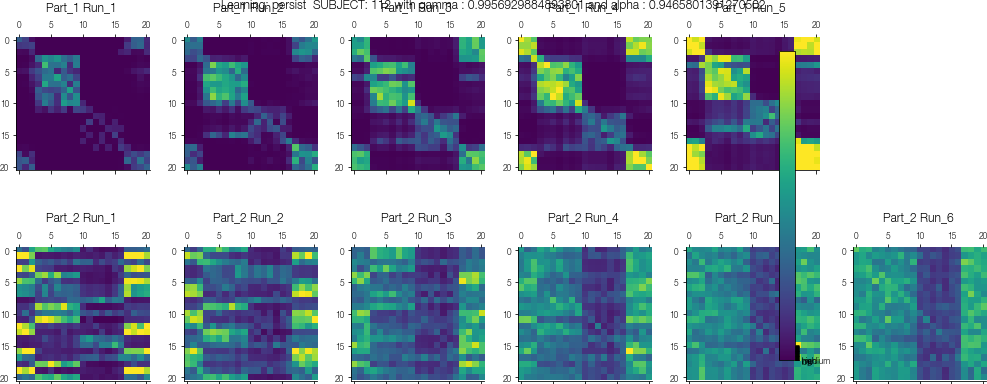

In [4]:
# plot the SR matrix after each run
M = sr.learn_sr(df_struct, gamma, alpha)
plot_models.plot_explore_runs(M, subject, 'persist', gamma, alpha, vmax=10)